# This is the notebook for assignment_0: q13 EDA

In [1]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# importing the dataset

df = pd.read_csv('energy.csv')

### 1. Dataset source

I have used the dataset from https://www.makeovermonday.co.uk/data/. The dataset is "Energy Use at 10 Downing Street".

### 2. Dataset description

This dataset measures the energy use in kwH for Downing Street Complex (home and residence for British PM).
The dataset measures the values for year of 2017 and gives the energy consumption in every half-hour interval.

The dataset is of interest to me as I am interested in applications of data science to renewable energy, agriculture and computer vision. I wanted to analyze the energy usage at the British PM House and how that usage changes over a period of one year.

There are 3 variables: "Date", "Time", "Electricity Used (in kwH)"
There are 17519 observations for each variable (after removing the null value).

### 3. Missing values

There is 1 missing value in "Electricity Used" column. At starting point, there is no energy used. 
Therefore, I have dropped that value. There are no other missing values in the data.

### 4.1 Data munging

In [2]:
# Dropping the null value
df = df.dropna()

# Renaming columns to shorten the names and remove any whitespace from column names
df.columns = ['time', 'elec', 'date']

# Combining date time columns into one column
df['date_time'] = df['date'].astype(str) + ' ' + df['time']

# converting columns to date time format
df['date_time'] = pd.to_datetime(df['date_time'], infer_datetime_format = True)

# deleting date and time columns
df = df.drop(columns=['date', 'time'])

# setting index of the dataframe as new date_time column so mean and median for different frequencies can be found.
df = df.set_index('date_time')


### 4.2 Summary statistics

In [3]:
# inspect dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17519 entries, 2017-01-01 00:30:00 to 2017-12-31 09:30:00
Data columns (total 1 columns):
elec    17519 non-null float64
dtypes: float64(1)
memory usage: 273.7 KB


In [4]:
# visit first 5 rows of dataset
df.head()

,elec
date_time,
2017-01-01 00:30:00,50.8
2017-01-01 01:00:00,54.1
2017-01-01 01:30:00,54.0
2017-01-01 10:00:00,50.3
2017-01-01 10:30:00,51.4


In [5]:
# description of the dataset
df.describe()

,elec
count,17519.000000
mean,57.833164
std,13.721961
min,36.900000
25%,45.500000
50%,55.200000
75%,68.100000
max,107.800000


### 4.3 Plotting the dataset

Text(0.5, 1.0, 'Frequency of energy usage in half-hour intervals during 2017 at 10 Downing Street')

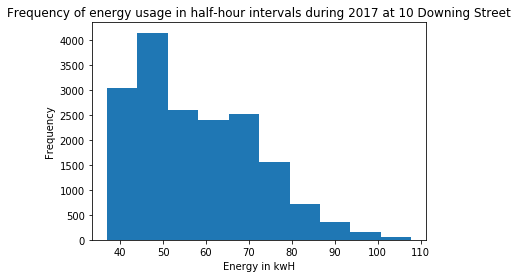

In [6]:
# plotting histogram of the energy values 
plt.hist(df['elec'])
plt.xlabel('Energy in kwH')
plt.ylabel('Frequency')
plt.title('Frequency of energy usage in half-hour intervals during 2017 at 10 Downing Street')

Text(0.5, 1.0, 'Distribution of energy usage in half-hour intervals during 2017 at 10 Downing Street')

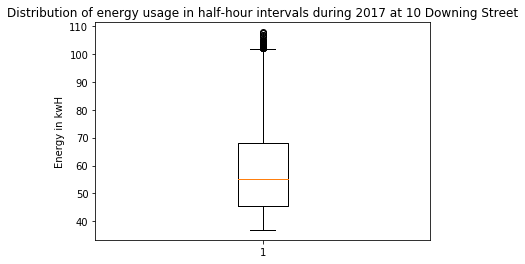

In [7]:
plt.boxplot(df['elec'])
plt.ylabel('Energy in kwH')
plt.title('Distribution of energy usage in half-hour intervals during 2017 at 10 Downing Street')

In [8]:
# Resampling: calculating mean and median of energy usage on daily, weekly, monthly basis.
daily_mean = df.resample('D').mean()
daily_median = df.resample('D').median()

weekly_mean = df.resample('W').mean()
weekly_median = df.resample('W').median()

monthly_mean = df.resample('M').mean()
monthly_median = df.resample('M').median()

## plotting mean and median energy values on daily, weekly, monthly basis to visualize trends.

Text(0.5, 1.0, 'Average Daily Energy Usage at 10 Downing Street during the year 2017')

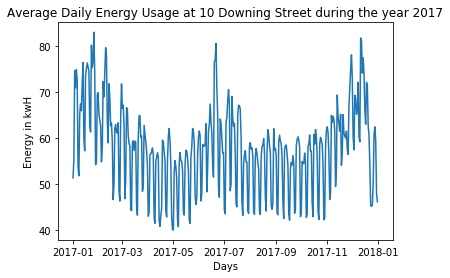

In [9]:
plt.plot(daily_mean)
plt.xlabel('Days')
plt.ylabel('Energy in kwH')
plt.title('Average Daily Energy Usage at 10 Downing Street during the year 2017')

Text(0.5, 1.0, 'Median Daily Energy Usage at 10 Downing Street during the year 2017')

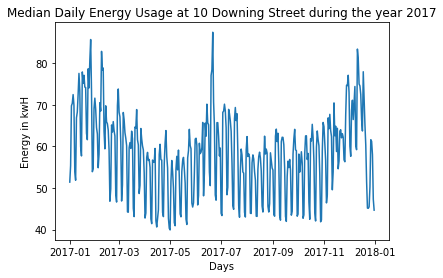

In [10]:
plt.plot(daily_median)
plt.xlabel('Days')
plt.ylabel('Energy in kwH')
plt.title('Median Daily Energy Usage at 10 Downing Street during the year 2017')

Text(0.5, 1.0, 'Average Weekly Energy Usage at 10 Downing Street during the year 2017')

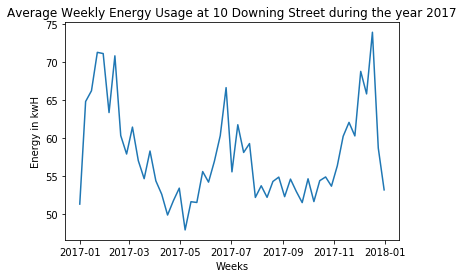

In [11]:
plt.plot(weekly_mean)
plt.xlabel('Weeks')
plt.ylabel('Energy in kwH')
plt.title('Average Weekly Energy Usage at 10 Downing Street during the year 2017')

Text(0.5, 1.0, 'Median Weekly Energy Usage at 10 Downing Street during the year 2017')

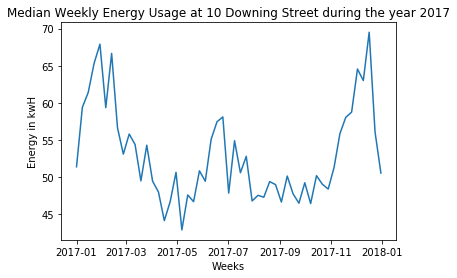

In [12]:
plt.plot(weekly_median)
plt.xlabel('Weeks')
plt.ylabel('Energy in kwH')
plt.title('Median Weekly Energy Usage at 10 Downing Street during the year 2017')

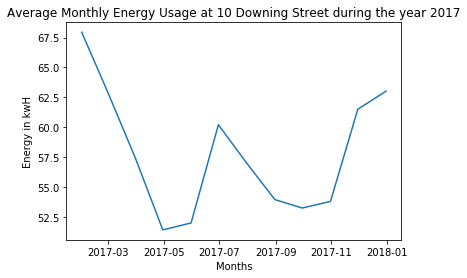

In [13]:
plt.plot(monthly_mean)
plt.xlabel('Months')
plt.ylabel('Energy in kwH')
plt.title('Average Monthly Energy Usage at 10 Downing Street during the year 2017')
plt.show()

Text(0.5, 1.0, 'Median Monthly Energy Usage at 10 Downing Street during the year 2017')

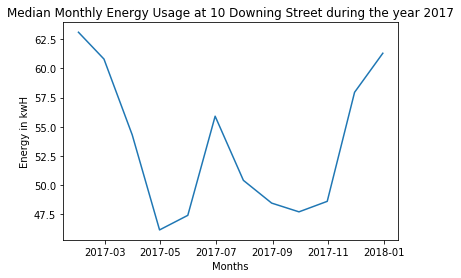

In [14]:
plt.plot(monthly_median)
plt.xlabel('Months')
plt.ylabel('Energy in kwH')
plt.title('Median Monthly Energy Usage at 10 Downing Street during the year 2017')

In [15]:
daily_mean.describe()

,elec
count,365.000000
mean,57.832794
std,9.355070
min,40.052083
25%,53.004167
50%,58.175000
75%,62.929167
max,83.027083


In [16]:
daily_mean[daily_mean['elec'] <= 41]

,elec
date_time,
2017-04-15,40.818750
2017-04-30,40.052083
2017-05-01,40.068750
2017-05-07,40.768750


In [17]:
daily_mean[daily_mean['elec'] >= 80]

,elec
date_time,
2017-01-23,80.208333
2017-01-26,83.027083
2017-06-21,80.564583
2017-12-11,81.787500
2017-12-12,81.129167


In [18]:
daily_median.describe()

,elec
count,365.000000
mean,58.383836
std,9.889764
min,39.900000
25%,51.850000
50%,58.750000
75%,64.350000
max,87.450000


In [19]:
weekly_mean.describe()

,elec
count,53.000000
mean,57.728106
std,6.195600
min,47.963690
25%,53.229464
50%,55.600298
75%,60.372024
max,73.961607


In [20]:
weekly_median.describe()

,elec
count,53.000000
mean,53.028302
std,6.395149
min,42.900000
25%,48.000000
50%,50.650000
75%,56.650000
max,69.500000


In [21]:
monthly_mean.describe()

,elec
count,12.000000
mean,57.862146
std,5.262894
min,51.391250
25%,53.639253
50%,57.188844
75%,61.873091
max,67.942569


In [22]:
monthly_median.describe()

,elec
count,12.000000
mean,53.504167
std,6.153250
min,46.150000
25%,48.262500
50%,52.350000
75%,58.662500
max,63.100000


### 5. Insights

According to the website https://platform.carbonculture.net/places/10-downing-street/9/ that shares the aforementioned dataset, 100% of the PMO's electricity supply is on a green tariff i.e. the electricity is generated from renewable resources. 10 Downing Street shares its energy data publicly so that they can get useful insights about their energy usage. 

There is not much difference if we use mean or median for summarising the statistics of electricity usage.
This implies that there are very less outliers in the data for all three daily, weekly and monthly categories. Hence there are no sudden high or low energy usages. 

Range for monthly energy usage is 51 to 61 kwH approximately. It can be seen from the plot that the energy usage rises sharply during the winter season (November to January) and declines till May. The energy usage rises again till July (reaches a second peak) and declines after that till winter. Such usage is in agreement with the weather data for 2017 from wikipedia and other climate data websites. 

If the trend lines are further zoomed in, we find the range for the energy usage is approximately 47 kwH to 73 kwH (on weekly basis) and 40 kwH to 83 kwH (on daily basis). 

The mean and variance is not constant in all the plots.

The overall increase or decrease is same over long periods in case of weekly basis but there are local peaks or troughs in the data.

However, when we look at plot of daily data, the peak is in June (during the summer) too, in addition to December and January (during the winters). Also, the trough (lowest energy usage) is during the summer days (30th April and 1st May). On 21st June the average daily energy usage is 80 kwH which is similar to coldest days in the winter. This point should be further explored why the energy usage is unusally high in the PMO (Prime Minister’s Office) during that particular day. On doing a quick google search of "21 June 2017 London", it comes to our notice that that particular day was the hottest June day for the 40 years due to UK heatwave. The heat brought health warnings of toxic air in many parts of England. National Health Service England urged elderly, children and patients to keep cool and hydrated. This explains the unusual high energy usage during the summer on that particular day.

This trend analysis (by visualizing plots) also signifies seasonal effects, i.e. there is variation in the data with the seasons. Since the mean and variance change over time,  the energy usage data for 10 Downing Street during 2017 is "Non-Stationary Time Series". This means that forecasting the energy usage for PMO is dependent on the time of observation, and cannot be predicted by looking at previous data alone.